In [7]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
new_base_dir = pathlib.Path("C:/Users/user/딥러닝/cats_vs_dogs_small")

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 15s 15ms/step - loss: 0.1543 - accuracy: 0.9531
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0438 - accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0305 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0175 - accuracy: 0.9945


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0271 - accuracy: 0.9913
Test accuracy: 0.991


In [10]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'cats_vs_dogs_small\\train\\cat'

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [14]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 500 files belonging to 1 classes.


In [15]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [16]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [17]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [18]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [19]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=3,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/3
63/63 [==============================] - 38s 586ms/step - loss: 0.7428 - accuracy: 0.5115 - val_loss: 0.6904 - val_accuracy: 0.5020
Epoch 2/3
63/63 [==============================] - 37s 593ms/step - loss: 0.7009 - accuracy: 0.5450 - val_loss: 0.6590 - val_accuracy: 0.6110
Epoch 3/3
63/63 [==============================] - 38s 599ms/step - loss: 0.6671 - accuracy: 0.6280 - val_loss: 0.6262 - val_accuracy: 0.6360


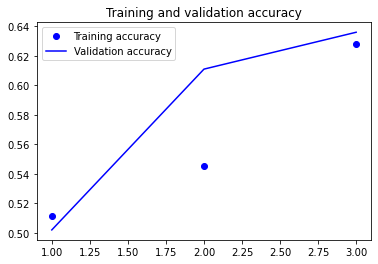

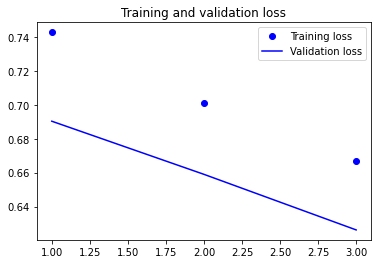

In [21]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [22]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 3s 130ms/step - loss: 0.8249 - accuracy: 0.3580
Test accuracy: 0.358


In [23]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

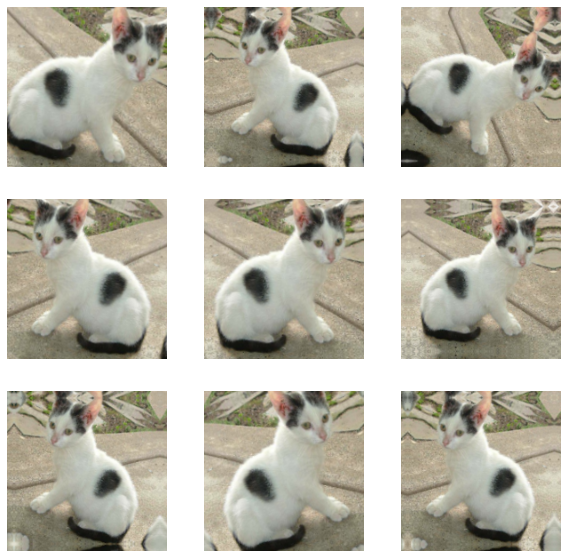

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# 12.5

# 사전 훈련된 모델 사용하기
- 1. FC(fully connected)만 사용하기 : 빠른 특성 추출
- 2. Conv층 일부 사용하기: 미세 조정(Fine Tuning)

conv를 불러온 것은 : 훈련을 한 가중치(벡터, 텐서)들을 다 가지고 와서 
통과하고나면 결과물이 1개로 나오고
flection을 거쳐 펼쳐짐 => output


미세조정: 층의 일부 층은 내가 훈련을 다시 시키겠다.
처음부터 훈련을 다시 시키되, 다른 부분을 묶어두고 건들지 않고 일부분만 바꾸겠다
=> 가중치가 바뀌게 됨. 
코드8-24의 내용
 conv_base.trainable = True(False)   한줄만 써주면 바뀐다.
 
코드8-27의 내용  = 미세조정을 한 것임
 앞에서부터 뒤에서 4번째까지는 false, 4번째 이후부터는 true
 

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# 8-19 VGG16 합성곱 기반층 만들기
conv_base = keras.applications.vgg16.VGG16(
    weights = 'imagenet',    #저장된 이미지넷을 가져온다
    include_top = False,     # fullyconnected를 사용하지 않는다
    input_shape = (180, 180, 3)) # vgg의 형태. 변경 불가

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [4]:
# vgg-16
# layer의 개수: 16개 conv(2+2+3+3+3)+dene3

#conv과정을 feature extrension

In [25]:
# 8-20
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 861ms/step


# 중요한 점은   p.316
predict()메서드가 레이블은 제외하고 이미지만 기대한다.
output: features가 됨(flectin한 직전의 상태가 됨)

preprocess_input한 이미지만 받들일 수 있다.(전처리 한 이미지= vgg-16이 받아들일 수 있는 형태(18,18,3))
= preprocess_input

evaluate에 집어 넣을 때 test만 집어 넣으면 안될 수 도 있다: 이유= 전처리 하지 않은 것을 넣었기 때문.


In [70]:
train_features.shape

(2000, 5, 5, 512)

In [26]:
# 8-20 밀집 연결 분류기 정의하고 훈련하기
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)   #dense는 1개, sigmid로
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks) 


# 시간이 얼마나 걸리는지 => 완전 빨라짐

Epoch 1/20
63/63 [==============================] - 2s 30ms/step - loss: 16.1372 - accuracy: 0.9280 - val_loss: 4.1692 - val_accuracy: 0.9660
Epoch 2/20
63/63 [==============================] - 2s 27ms/step - loss: 4.3065 - accuracy: 0.9730 - val_loss: 3.0073 - val_accuracy: 0.9780
Epoch 3/20
63/63 [==============================] - 1s 23ms/step - loss: 1.5807 - accuracy: 0.9900 - val_loss: 3.9118 - val_accuracy: 0.9750
Epoch 4/20
63/63 [==============================] - 1s 23ms/step - loss: 1.1168 - accuracy: 0.9905 - val_loss: 5.5142 - val_accuracy: 0.9680
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 0.9844 - accuracy: 0.9905 - val_loss: 3.8070 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 1s 23ms/step - loss: 0.2886 - accuracy: 0.9955 - val_loss: 4.0902 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 1s 23ms/step - loss: 1.4799 - accuracy: 0.9905 - val_loss: 5.6867 - val_accuracy: 0.9680
Epoch 8/20
6

In [77]:
# feature_extraction.keras 이 저장되어있다.
# 불러다가 testset을 이용하여 accuracy를 확인해보자.
# accuracy찾기



# 0.602 -> customdata로 했더니  0.967

In [27]:
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 0s 3ms/step - loss: 3.9045 - accuracy: 0.9840
Test accuracy: 0.984


### 두번째데이터 증식을 위한 특성추출
- 미세조정
- p.318

In [ ]:
# 동결 = 가중치가 업데이트 되지 않게 막는 것
가중치가 수정된다는 것 = 뒤죽박죽 되지 않게

1. conv_base불러오기
2. p.323의 순서를 따라야 한다.
3. 

In [29]:
# vgg16 합성곱 기반 층을 만들고 동결하기
# 1. 데이터 불러오기
conv_base = keras.applications.vgg16.VGG16(
    weights = 'imagenet',    #저장된 이미지넷을 가져온다
    include_top = False,     # fullyconnected를 사용하지 않는다
    input_shape = (180, 180, 3)) # vgg의 형태. 변경 불가
conv_base.trainable = False

In [32]:
# 8-24 동결하기 전과 후에 훈련 가능한 가중치 리스트 출력하기
conv_base.trainable = True
print("합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수:",
     len(conv_base.trainable_weights))

conv_base.trainable =False
print("합성곱 기반 층을 동경한 후의 훈련 가능한 가중치 개수:",
     len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수: 26
합성곱 기반 층을 동경한 후의 훈련 가능한 가중치 개수: 0


In [33]:
# 8-25 데이터 증식 단계와 밀집 분류기를 합성곱 기반 층에 추가하기
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))    # 이부분이 바뀜
x = data_augmentation(inputs)                # 데이터 증강을 시킬 수 있게 해줌
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)                             # conv_base통과시킴
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

- 위에꺼랑 비교해보기(이게 위에서 가지도 온거임)

inputs = keras.Input(shape=(5, 5, 512))   #felectin직전의 모습임
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)   #dense는 1개, sigmid로
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks) 

In [100]:
inputs = keras.Input(shape=(180, 180, 3))    #felectin직전의 모습임
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)   #dense는 1개, sigmid로
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)  

Epoch 1/20
63/63 [==============================] - 14s 210ms/step - loss: 48210.6367 - accuracy: 0.5030 - val_loss: 62872.2344 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 13s 212ms/step - loss: 29607.4727 - accuracy: 0.4960 - val_loss: 9091.1758 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 12s 193ms/step - loss: 18199.0039 - accuracy: 0.5160 - val_loss: 28721.2559 - val_accuracy: 0.5000
Epoch 4/20
63/63 [==============================] - 13s 211ms/step - loss: 11804.4434 - accuracy: 0.5090 - val_loss: 9020.5576 - val_accuracy: 0.5030
Epoch 5/20
63/63 [==============================] - 13s 208ms/step - loss: 5779.4316 - accuracy: 0.5225 - val_loss: 5272.3105 - val_accuracy: 0.5020
Epoch 6/20
63/63 [==============================] - 13s 209ms/step - loss: 2498.1829 - accuracy: 0.5085 - val_loss: 654.0499 - val_accuracy: 0.5210
Epoch 7/20
63/63 [==============================] - 14s 216ms/step - loss: 765.3042 - accuracy: 0.502

In [34]:
# 8-26 테스트 세트에서 모델 평가하기
test_model = keras.model.load_mode(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

AttributeError: module 'tensorflow.keras' has no attribute 'model'

## 8.3.2 사전 훈련된 모델 미세 조정하기
- 모델을 재사용 하는 데 널리 사용되는 또 하나의 기법은 특성 추출을 보완하는 미세조정이다.
- 주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에 미세조정이라 함.

### 네트워크를 미세조정 하는 단계
- 1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가
- 2. 기반 네트워크를 동결
- 3. 새로 추가한 네트워크를 훈련
- 4. 기반 네트워크에서 일부 층의 동결을 해제('배치정규화')층은 동결 해제하 안됨.
    VGG16에는 이런 층이 없기 때문에 여기엑서는 해당되지 않음
- 5. 동결을 해제한 층과 새로 추가한 층을 함께 훈련

In [35]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [36]:
# 8-27 마지막에서 네번째 층까지 모든 층 동결하기
# 4. 일부 층의 동결을 해제함
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
# 8-28 모델 미세 조정하기
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)  

Epoch 1/30
63/63 [==============================] - 223s 4s/step - loss: 0.6934 - accuracy: 0.5020 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 232s 4s/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 233s 4s/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 235s 4s/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/30
63/63 [==============================] - 243s 4s/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/30
63/63 [==============================] - 237s 4s/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/30
63/63 [==============================] - 235s 4s/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/30
63

학습률을 낮추는 이유는 미세 조정하는 3개의 층에서 학습된 표현을 조금씩 수정하기 위해서.
변경량이 너무 크면 학습된 표현에 나쁜 영향을 끼칠 수 있음.

In [ ]:
# 8-28 테스트 데이터에서 모델 평가하기
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")